# Imports

In [2]:
import layoutparser as lp
import os
from PIL import Image
import pandas as pd
import tqdm
import re
import math
from typing import DefaultDict
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
from nltk.corpus import words as english_dict

In [3]:
import cv2
from pdf2image import convert_from_path
from pytesseract import Output
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\sagar.panwar\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [4]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# Path

In [5]:
input_dir = r'C:\Users\sagar.panwar\Documents\projects\resumse_parser\data\pdf'
skill_keyword_path = r'C:\Users\sagar.panwar\Documents\projects\resumse_parser\data\skill_titles_combined.txt'

In [6]:
output_dir = r'C:\Users\sagar.panwar\Documents\projects\resumse_parser\data'

# Keywords

In [242]:
objective = (
    'career goal',
    'objective',
    'career objective',
    'employment objective',
    'professional objective',        
    'career summary',
    'professional summary',
    'summary of qualifications',
    'summary',
    'digital'
)

work_and_employment = (
    'career profile',
    'employment history',
    'work history',
    'work experience',
    'experience',
    'professional experience',
    'professional background',
    'additional experience',
    'career related experience',
    'related experience',
    'programming experience',
    'freelance',
    'freelance experience',
    'army experience',
    'military experience',
    'military background',
)

education_and_training = (
    'academic background',
    'academic experience',
    'programs',
    'courses',
    'related courses',
    'education',
    'qualifications',
    'educational background',
    'educational qualifications',
    'educational training',
    'education and training',
    'training',
    'academic training',
    'professional training',
    'course project experience',
    'related course projects',
    'internship experience',
    'internships',
    'apprenticeships',
    'college activities',
    'certifications',
    'special training',
)

skills_header = (
    'credentials',
    'areas of experience',
    'areas of expertise',
    'areas of knowledge',
    'skills',
    "other skills",
    "other abilities",
    'career related skills',
    'professional skills',
    'specialized skills',
    'technical skills',
    'computer skills',
    'personal skills',
    'computer knowledge',        
    'technologies',
    'technical experience',
    'proficiencies',
    'languages',
    'language competencies and skills',
    'programming languages',
    'competencies'
)

misc = (
    'activities and honors',
    'activities',
    'affiliations',
    'professional affiliations',
    'associations',
    'professional associations',
    'memberships',
    'professional memberships',
    'athletic involvement',
    'community involvement',
    'refere',
    'civic activities',
    'extra-Curricular activities',
    'professional activities',
    'volunteer work',
    'volunteer experience',
    'additional information',
    'interests',
    'technology'
)

accomplishments = (
    'achievement',
    'licenses',
    'presentations',
    'conference presentations',
    'conventions',
    'dissertations',
    'exhibits',
    'papers',
    'publications',
    'professional publications',
    'research',
    'research grants',
    'project',
    'research projects',
    'personal projects',
    'current research interests',
    'thesis',
    'theses',
)
job_titles = (
    'Software Engineer',
    'Data Scientist',
    'fullstack Developer',
    'Frontend Developer',
    'Backend Developer',
    'Q/A',
    'Q/A Testing',
    'Q/A Tester'
    'Associate',
    'Vice President'
    'Senior Vice President',
    'Software Engineer',
    'Data Scientist',
    'Product Manager',
    'UX/UI Designer',
    'Systems Administrator',
    'Network Engineer',
    'DevOps Engineer',
    'Web Developer',
    'Mobile App Developer',
    'Full Stack Developer',
    'Front-End Developer',
    'Back-End Developer',
    'Machine Learning Engineer',
    'AI Researcher',
    'Cybersecurity Analyst',
    'Database Administrator',
    'Project Manager',
    'Quality Assurance Engineer',
    'Technical Support Specialist',
    'Cloud Architect',
    'Consultant',
    'Business Analyst',
    'Systems Analyst',
    'Data Analyst',
    'Solutions Architect',
    'Operations Manager',
    'Security Manager',
    'Network Security Engineer',
    'Trainer',
    'Software Architect',
    'Embedded Systems Engineer',
    'Game Developer',
    'Sales Executive',
    'Risk Manager',
    'Service Delivery Manager',
    'Director',
    'Manager',
    'Support Technician',
    'Data Engineer',
    'UX Researcher',
    'Cloud Engineer',
    'Data Warehouse Developer',
    'Robotics Engineer',
    'Trainer',
    'Help Desk Technician',
    'Service Desk Manager',
    'Business Intelligence Analyst',
    'Financial Analyst',
    'Contract Administrator',
    'Team Lead',
    'Software Developer',
    'Associate Recruiting',
    'Associate Consultant',
    'SDE1',
    'SDE2',
    'SD1',
    'SD2',
    'Java Developer',
    'Employee Engagement Specialist',
    'Executive Operations',
    'Client Relationship Executive',
    'HR Intern',
    'PROJECT ASSOCIATE',
    'Project Engineer',
    'Team Member',
    'Module Leader',
    'Onsite Team Member',
    'Offshore Project Lead'
    'Project Lead',
    'Portfolio Manager',
    'Java Architect',
    'Technical Specialist',
    'Technical manager',
    'Technical Lead',
    'IT Recruiter',
    'Recruiter',
    'Transaction analyst'
)

In [112]:
keyword_dict = {}
# keyword_dict['job_titles']             = list(job_titles) 
keyword_dict['accomplishments']        = list(accomplishments) 
keyword_dict['misc']                   = list(misc) 
keyword_dict['skills_header']          = list(skills_header)  
keyword_dict['education_and_training'] = list(education_and_training) 
keyword_dict['work_and_employment']    = list(work_and_employment) 
keyword_dict['objective']              = list(objective) 

In [113]:
all_keywords = (list(job_titles) 
                + list(accomplishments) 
                + list(misc) + list(skills_header)  
                + list(education_and_training) 
                + list(work_and_employment) 
                + list(objective) )

In [114]:
all_keywords

['Software Engineer',
 'Data Scientist',
 'fullstack Developer',
 'Frontend Developer',
 'Backend Developer',
 'Q/A',
 'Testing',
 'Associate',
 'Vice PresidentSenior Vice President',
 'Software Engineer',
 'Data Scientist',
 'Product Manager',
 'UX/UI Designer',
 'Systems Administrator',
 'Network Engineer',
 'DevOps Engineer',
 'Web Developer',
 'Mobile App Developer',
 'Full Stack Developer',
 'Front-End Developer',
 'Back-End Developer',
 'Machine Learning Engineer',
 'AI Researcher',
 'Cybersecurity Analyst',
 'Database Administrator',
 'Project Manager',
 'Quality Assurance Engineer',
 'Technical Support Specialist',
 'Cloud Architect',
 'Consultant',
 'Business Analyst',
 'Systems Analyst',
 'Data Analyst',
 'Solutions Architect',
 'Operations Manager',
 'Security Manager',
 'Network Security Engineer',
 'Trainer',
 'Software Architect',
 'Embedded Systems Engineer',
 'Game Developer',
 'Sales Executive',
 'Risk Manager',
 'Service Delivery Manager',
 'Director',
 'Manager',
 'S

# Logic

## Word Detection

In [76]:
def get_first_page_layout(path):
    pdf_layout = lp.load_pdf(path)
    return pdf_layout[0] 

## Convert Camel name

In [77]:
def convert_camel_name(name):
    name = re.sub(r'((?<=[a-z])[A-Z]|(?<!\A)[A-Z](?=[a-z]))', r' \1', name)
    name = re.sub(' +', ' ', name)
    return name

## Check character is space separated

In [78]:
def space_separated_names(name):
    name_list = name.split(' ')
    for char in name_list:
        if len(char)!=1:
            return name
    return name.replace(' ', '')

## Remove string

In [79]:
def remove_substring(name):
    name = name.lower()
    name = name.split('ph')[0]
    name = name.split('location')[0]
    name = name.split('address')[0]
    name = name.split('email')[0]
    name = name.split('e-mail')[0]
    name = name.split('mail')[0]
    return name

## Clean Name

In [80]:
def clean_name(name):
    name = name.lower()
    
    name = ' '.join([i for i in name.split() if '@' not in i])
    name = ' '.join([re.sub("[^a-zA-Z]+", "", i) for i in name.split()])
    name = remove_substring(name)
    print(name)
    name = name.replace('name', '')
    name = name.replace('email', '')
    name = name.replace('id', '')
    name = name.replace('cv', '')
    name = name.replace('curriculum vitae', '')
    name = name.replace('mail', '')
    return name.title()

## Remove Keywords

In [81]:
def remove_keywords_from_name(name):
    remove_words = [i.split(' ') for i in all_keywords]
    remove_words = [i2.lower() for i in remove_words for i2 in i if len(i2)>=3]
    excluded_words = ['areas', 'and', 'current', 'other', 'related', 'special']
    remove_words = set([i for i in remove_words if i not in excluded_words])
    
    new_name_words = []
    for val in name.split(' '):
        if val.lower() in remove_words:
            continue
        new_name_words.append(val)
        
    new_name = ' '.join(new_name_words)
    
    return new_name

## Find Name

In [87]:
def get_resume_name(layout):
    text_blocks      = list(layout)
    text_cluster_df  = pd.DataFrame(columns=['id', 'y1', 'y2', 'text'])

    for index in range(len(text_blocks)):
        block = text_blocks[index]
        y1    = round(block.block.y_1, 1)
        y2    = round(block.block.y_2, 1)
        text  = block.text
        id    = block.id

        text_cluster_df.loc[len(text_cluster_df.index)] = [id, y1, y2, text]
        
    index_dict = text_cluster_df.sort_values(['y1'],ascending=False).groupby(by=['y1', 'y2']).groups
    keys       = list(index_dict)
    
    for index in range(min(10, len(index_dict))):
        words = text_cluster_df.groupby(by=['y1', 'y2']).get_group(keys[index])['text'].tolist()
        text  = ' '.join(words)
        text  = ''.join([i for i in text if ((not i.isdigit()) and i!='+')])
        
        print(text)
        text  = convert_camel_name(text)
        print('camel: ', text)
        text  = text.title()
        print('title: ', text)
        text  = space_separated_names(text)
        print('space: ', text)
        text = clean_name(text)
        print('clean: ', text)
        text = remove_keywords_from_name(text)
        print('remove keywords: ', text)
        
        word_per_name = len(text.strip().split(' '))
        
        if len(text)>=4 and word_per_name<4:
            if not (text.lower() in english_dict.words()):
                print('name: ', text.strip())
                return text.strip()

# Name

In [88]:
len(os.listdir(input_dir))

73

In [250]:
%%time
df_name = pd.DataFrame(columns=['path', 'filename', 'name'])
iterr = 0
for file_name in tqdm.tqdm(os.listdir(input_dir)):
    print(iterr)
    iterr = iterr +1
    path    = os.path.join(input_dir, file_name)
    name_id = file_name.split('.')[0]
    
    try:
        layout = get_first_page_layout(path)
        name   = get_resume_name(layout)
    except IndexError:
        name = ''
        pass
    df_name.loc[len(df_name.index)] = [path, name_id, name]

  0%|                                                                                           | 0/73 [00:00<?, ?it/s]

0


  1%|█▏                                                                                 | 1/73 [00:01<01:48,  1.51s/it]

NITIN KUMAR
camel:  NITIN KUMAR
title:  Nitin Kumar
space:  Nitin Kumar
nitin kumar
clean:  Nitin Kumar
remove keywords:  Nitin Kumar
name:  Nitin Kumar
1


  3%|██▎                                                                                | 2/73 [00:02<01:31,  1.30s/it]

SAURAV NARAYAN ANAND
camel:  SAURAV NARAYAN ANAND
title:  Saurav Narayan Anand
space:  Saurav Narayan Anand
saurav narayan anand
clean:  Saurav Narayan Anand
remove keywords:  Saurav Narayan Anand
name:  Saurav Narayan Anand
2


  4%|███▍                                                                               | 3/73 [00:04<01:50,  1.58s/it]

CHARU GUPTA
camel:  CHARU GUPTA
title:  Charu Gupta
space:  Charu Gupta
charu gupta
clean:  Charu Gupta
remove keywords:  Charu Gupta
name:  Charu Gupta
3


  5%|████▌                                                                              | 4/73 [00:05<01:39,  1.44s/it]

AMAN GUPTA
camel:  AMAN GUPTA
title:  Aman Gupta
space:  Aman Gupta
aman gupta
clean:  Aman Gupta
remove keywords:  Aman Gupta
name:  Aman Gupta
4


  7%|█████▋                                                                             | 5/73 [00:10<02:54,  2.57s/it]

Amit Sethi
camel:  Amit Sethi
title:  Amit Sethi
space:  Amit Sethi
amit sethi
clean:  Amit Sethi
remove keywords:  Amit Sethi
name:  Amit Sethi
5


  8%|██████▊                                                                            | 6/73 [00:15<03:45,  3.36s/it]

Amit Sharma
camel:  Amit Sharma
title:  Amit Sharma
space:  Amit Sharma
amit sharma
clean:  Amit Sharma
remove keywords:  Amit Sharma
name:  Amit Sharma
6


 10%|███████▉                                                                           | 7/73 [00:16<03:01,  2.75s/it]

Anjali Singh
camel:  Anjali Singh
title:  Anjali Singh
space:  Anjali Singh
anjali singh
clean:  Anjali Singh
remove keywords:  Anjali Singh
name:  Anjali Singh
7


 11%|█████████                                                                          | 8/73 [00:17<02:14,  2.07s/it]

Arjit Gupta
camel:  Arjit Gupta
title:  Arjit Gupta
space:  Arjit Gupta
arjit gupta
clean:  Arjit Gupta
remove keywords:  Arjit Gupta
name:  Arjit Gupta
8


 12%|██████████▏                                                                        | 9/73 [00:18<01:58,  1.85s/it]

SYED ARSHAD ALI
camel:  SYED ARSHAD ALI
title:  Syed Arshad Ali
space:  Syed Arshad Ali
syed arshad ali
clean:  Syed Arshad Ali
remove keywords:  Syed Arshad Ali
name:  Syed Arshad Ali
9


 14%|███████████▏                                                                      | 10/73 [00:20<01:45,  1.68s/it]

ASHISH KAPOOR
camel:  ASHISH KAPOOR
title:  Ashish Kapoor
space:  Ashish Kapoor
ashish kapoor
clean:  Ashish Kapoor
remove keywords:  Ashish Kapoor
name:  Ashish Kapoor
10


 15%|████████████▎                                                                     | 11/73 [00:24<02:31,  2.44s/it]

AsishChandraChoudhury
camel:  Asish Chandra Choudhury
title:  Asish Chandra Choudhury
space:  Asish Chandra Choudhury
asish chandra choudhury
clean:  Asish Chandra Choudhury
remove keywords:  Asish Chandra Choudhury
name:  Asish Chandra Choudhury
11


 16%|█████████████▍                                                                    | 12/73 [00:25<02:13,  2.19s/it]

Asif Nawaz
camel:  Asif Nawaz
title:  Asif Nawaz
space:  Asif Nawaz
asif nawaz
clean:  Asif Nawaz
remove keywords:  Asif Nawaz
name:  Asif Nawaz
12


 18%|██████████████▌                                                                   | 13/73 [00:27<02:02,  2.04s/it]

Chippada Monisha  
camel:  Chippada Monisha 
title:  Chippada Monisha 
space:  Chippada Monisha 
chippada monisha
clean:  Chippada Monisha
remove keywords:  Chippada Monisha
name:  Chippada Monisha
13


 19%|███████████████▋                                                                  | 14/73 [00:29<01:59,  2.02s/it]

Ms.
camel:  Ms.
title:  Ms.
space:  Ms.
ms
clean:  Ms
remove keywords:  Ms
Priya Rajkumar Gajare
camel:  Priya Rajkumar Gajare
title:  Priya Rajkumar Gajare
space:  Priya Rajkumar Gajare
priya rajkumar gajare
clean:  Priya Rajkumar Gajare
remove keywords:  Priya Rajkumar Gajare
name:  Priya Rajkumar Gajare
14


 21%|████████████████▊                                                                 | 15/73 [00:31<01:54,  1.98s/it]

Jeevan Nagar, Sikar
camel:  Jeevan Nagar, Sikar
title:  Jeevan Nagar, Sikar
space:  Jeevan Nagar, Sikar
jeevan nagar sikar
clean:  Jeevan Nagar Sikar
remove keywords:  Jeevan Nagar Sikar
name:  Jeevan Nagar Sikar
15


 22%|█████████████████▉                                                                | 16/73 [00:32<01:42,  1.79s/it]

Maruti Nerli
camel:  Maruti Nerli
title:  Maruti Nerli
space:  Maruti Nerli
maruti nerli
clean:  Maruti Nerli
remove keywords:  Maruti Nerli
name:  Maruti Nerli
16


 23%|███████████████████                                                               | 17/73 [00:33<01:24,  1.51s/it]

G P
camel:  G P
title:  G P
space:  GP
gp
clean:  Gp
remove keywords:  Gp
A N E S H U J A R
camel:  A N E S H U J A R
title:  A N E S H U J A R
space:  ANESHUJAR
aneshujar
clean:  Aneshujar
remove keywords:  Aneshujar
name:  Aneshujar
17


 25%|████████████████████▏                                                             | 18/73 [00:36<01:43,  1.88s/it]

Employment
camel:  Employment
title:  Employment
space:  Employment
employment
clean:  Employment
remove keywords:  
Aman
camel:  Aman
title:  Aman
space:  Aman
aman
clean:  Aman
remove keywords:  Aman
name:  Aman
18


 26%|█████████████████████▎                                                            | 19/73 [00:37<01:33,  1.73s/it]

MUSKAN
camel:  MUSKAN
title:  Muskan
space:  Muskan
muskan
clean:  Muskan
remove keywords:  Muskan
name:  Muskan
19


 27%|██████████████████████▍                                                           | 20/73 [00:41<01:59,  2.25s/it]

Nadeem Ahmad
camel:  Nadeem Ahmad
title:  Nadeem Ahmad
space:  Nadeem Ahmad
nadeem ahmad
clean:  Nadeem Ahmad
remove keywords:  Nadeem Ahmad
name:  Nadeem Ahmad
20


 29%|███████████████████████▌                                                          | 21/73 [00:42<01:41,  1.94s/it]

AG
camel:  AG
title:  Ag
space:  Ag
ag
clean:  Ag
remove keywords:  Ag
AKASH GHODKE
camel:  AKASH GHODKE
title:  Akash Ghodke
space:  Akash Ghodke
akash ghodke
clean:  Akash Ghodke
remove keywords:  Akash Ghodke
name:  Akash Ghodke
21


 30%|████████████████████████▋                                                         | 22/73 [00:43<01:28,  1.73s/it]

GINNI NAND
camel:  GINNI NAND
title:  Ginni Nand
space:  Ginni Nand
ginni nand
clean:  Ginni Nand
remove keywords:  Ginni Nand
name:  Ginni Nand
22


 32%|█████████████████████████▊                                                        | 23/73 [00:44<01:18,  1.57s/it]

Ibrahim Ali Muneem
camel:  Ibrahim Ali Muneem
title:  Ibrahim Ali Muneem
space:  Ibrahim Ali Muneem
ibrahim ali muneem
clean:  Ibrahim Ali Muneem
remove keywords:  Ibrahim Ali Muneem
name:  Ibrahim Ali Muneem
23


 33%|██████████████████████████▉                                                       | 24/73 [00:47<01:33,  1.92s/it]

:
camel:  :
title:  :
space:  :

clean:  
remove keywords:  
Summary
camel:  Summary
title:  Summary
space:  Summary
summary
clean:  Summary
remove keywords:  
Senior Technical Manager
camel:  Senior Technical Manager
title:  Senior Technical Manager
space:  Senior Technical Manager
senior technical manager
clean:  Senior Technical Manager
remove keywords:  Senior
Around  years of IT industry experience with present profile being as for HCL
camel:  Around years of IT industry experience with present profile being as for HCL
title:  Around Years Of It Industry Experience With Present Profile Being As For Hcl
space:  Around Years Of It Industry Experience With Present Profile Being As For Hcl
around years of it industry experience with present profile being as for hcl
clean:  Around Years Of It Industry Experience With Present Profile Being As For Hcl
remove keywords:  Around Years Of It Industry With Present Being As For Hcl
Technologies, Noida.
camel:  Technologies, Noida.
title:  Tech

 34%|████████████████████████████                                                      | 25/73 [00:48<01:16,  1.59s/it]

Email Id –
camel:  Email Id –
title:  Email Id –
space:  Email Id –

clean:  
remove keywords:  
raghavendra.ab@gmail.com
camel:  raghavendra.ab@gmail.com
title:  Raghavendra.Ab@Gmail.Com
space:  Raghavendra.Ab@Gmail.Com

clean:  
remove keywords:  
Ph: -
camel:  Ph: -
title:  Ph: -
space:  Ph: -

clean:  
remove keywords:  
Location: India - Bengaluru
camel:  Location: India - Bengaluru
title:  Location: India - Bengaluru
space:  Location: India - Bengaluru

clean:  
remove keywords:  
Raghavendra B
camel:  Raghavendra B
title:  Raghavendra B
space:  Raghavendra B
raghavendra b
clean:  Raghavendra B
remove keywords:  Raghavendra B
name:  Raghavendra B
25


 36%|█████████████████████████████▏                                                    | 26/73 [00:49<01:05,  1.39s/it]

Sudhir Kumar Maurya
camel:  Sudhir Kumar Maurya
title:  Sudhir Kumar Maurya
space:  Sudhir Kumar Maurya
sudhir kumar maurya
clean:  Sudhir Kumar Maurya
remove keywords:  Sudhir Kumar Maurya
name:  Sudhir Kumar Maurya
26


 37%|██████████████████████████████▎                                                   | 27/73 [00:50<00:58,  1.27s/it]

INDRAJEET BHATTACHARYA
camel:  INDRAJEET BHATTACHARYA
title:  Indrajeet Bhattacharya
space:  Indrajeet Bhattacharya
indrajeet bhattacharya
clean:  Indrajeet Bhattacharya
remove keywords:  Indrajeet Bhattacharya
name:  Indrajeet Bhattacharya
27


 38%|███████████████████████████████▍                                                  | 28/73 [00:52<01:04,  1.44s/it]

Objective
camel:  Objective
title:  Objective
space:  Objective
objective
clean:  Objective
remove keywords:  
JITENDRA KUMAR
camel:  JITENDRA KUMAR
title:  Jitendra Kumar
space:  Jitendra Kumar
jitendra kumar
clean:  Jitendra Kumar
remove keywords:  Jitendra Kumar
name:  Jitendra Kumar
28


 40%|████████████████████████████████▌                                                 | 29/73 [00:54<01:12,  1.64s/it]

Jitendra
camel:  Jitendra
title:  Jitendra
space:  Jitendra
jitendra
clean:  Jitendra
remove keywords:  Jitendra
name:  Jitendra
29


 41%|█████████████████████████████████▋                                                | 30/73 [00:55<01:01,  1.43s/it]

KAMNA DHINGRA
camel:  KAMNA DHINGRA
title:  Kamna Dhingra
space:  Kamna Dhingra
kamna dhingra
clean:  Kamna Dhingra
remove keywords:  Kamna Dhingra
name:  Kamna Dhingra
30


 42%|██████████████████████████████████▊                                               | 31/73 [00:56<00:57,  1.36s/it]

Name: Krishan Singh Tanwar
camel:  Name: Krishan Singh Tanwar
title:  Name: Krishan Singh Tanwar
space:  Name: Krishan Singh Tanwar
name krishan singh tanwar
clean:   Krishan Singh Tanwar
remove keywords:   Krishan Singh Tanwar
name:  Krishan Singh Tanwar
31


 44%|███████████████████████████████████▉                                              | 32/73 [00:57<00:48,  1.17s/it]

KRITIKA GUPTA
camel:  KRITIKA GUPTA
title:  Kritika Gupta
space:  Kritika Gupta
kritika gupta
clean:  Kritika Gupta
remove keywords:  Kritika Gupta
name:  Kritika Gupta
32


 45%|█████████████████████████████████████                                             | 33/73 [00:58<00:44,  1.10s/it]

Flat no , Shivam Majestic,
camel:  Flat no , Shivam Majestic,
title:  Flat No , Shivam Majestic,
space:  Flat No , Shivam Majestic,
flat no  shivam majestic
clean:  Flat No  Shivam Majestic
remove keywords:  Flat No  Shivam Majestic
Ganesh Kumbhar
camel:  Ganesh Kumbhar
title:  Ganesh Kumbhar
space:  Ganesh Kumbhar
ganesh kumbhar
clean:  Ganesh Kumbhar
remove keywords:  Ganesh Kumbhar
name:  Ganesh Kumbhar
33


 47%|██████████████████████████████████████▏                                           | 34/73 [00:59<00:45,  1.16s/it]

Kunal Garg
camel:  Kunal Garg
title:  Kunal Garg
space:  Kunal Garg
kunal garg
clean:  Kunal Garg
remove keywords:  Kunal Garg
name:  Kunal Garg
34


 48%|███████████████████████████████████████▎                                          | 35/73 [01:00<00:42,  1.12s/it]

Lakshmi Maurya
camel:  Lakshmi Maurya
title:  Lakshmi Maurya
space:  Lakshmi Maurya
lakshmi maurya
clean:  Lakshmi Maurya
remove keywords:  Lakshmi Maurya
name:  Lakshmi Maurya
35


 49%|████████████████████████████████████████▍                                         | 36/73 [01:01<00:36,  1.02it/s]

Madhur Singhal
camel:  Madhur Singhal
title:  Madhur Singhal
space:  Madhur Singhal
madhur singhal
clean:  Madhur Singhal
remove keywords:  Madhur Singhal
name:  Madhur Singhal
36


 51%|█████████████████████████████████████████▌                                        | 37/73 [01:01<00:31,  1.13it/s]

Meeshu
camel:  Meeshu
title:  Meeshu
space:  Meeshu
meeshu
clean:  Meeshu
remove keywords:  Meeshu
name:  Meeshu
37
RESUME
camel:  RESUME
title:  Resume
space:  Resume
resume
clean:  Resume
remove keywords:  Resume
Mohit Gupta
camel:  Mohit Gupta
title:  Mohit Gupta
space:  Mohit Gupta
mohit gupta
clean:  Mohit Gupta
remove keywords:  Mohit Gupta


 52%|██████████████████████████████████████████▋                                       | 38/73 [01:03<00:36,  1.05s/it]

name:  Mohit Gupta
38


 53%|███████████████████████████████████████████▊                                      | 39/73 [01:04<00:38,  1.13s/it]

NAINA SHRIVASTAVA
camel:  NAINA SHRIVASTAVA
title:  Naina Shrivastava
space:  Naina Shrivastava
naina shrivastava
clean:  Naina Shrivastava
remove keywords:  Naina Shrivastava
name:  Naina Shrivastava
39


 55%|████████████████████████████████████████████▉                                     | 40/73 [01:05<00:37,  1.14s/it]

NALINI GUPTA
camel:  NALINI GUPTA
title:  Nalini Gupta
space:  Nalini Gupta
nalini gupta
clean:  Nalini Gupta
remove keywords:  Nalini Gupta
name:  Nalini Gupta
40


 56%|██████████████████████████████████████████████                                    | 41/73 [01:07<00:45,  1.44s/it]

Email: singhnarendra@gmail.com
camel:  Email: singhnarendra@gmail.com
title:  Email: Singhnarendra@Gmail.Com
space:  Email: Singhnarendra@Gmail.Com

clean:  
remove keywords:  
Narendra Singh
camel:  Narendra Singh
title:  Narendra Singh
space:  Narendra Singh
narendra singh
clean:  Narendra Singh
remove keywords:  Narendra Singh
name:  Narendra Singh
41


 58%|███████████████████████████████████████████████▏                                  | 42/73 [01:08<00:40,  1.30s/it]

Curriculum Vitae – Amit Dwivedi
camel:  Curriculum Vitae – Amit Dwivedi
title:  Curriculum Vitae – Amit Dwivedi
space:  Curriculum Vitae – Amit Dwivedi
curriculum vitae  amit dwivedi
clean:    Amit Dwivedi
remove keywords:    Amit Dwivedi
name:  Amit Dwivedi
42


 59%|████████████████████████████████████████████████▎                                 | 43/73 [01:09<00:35,  1.19s/it]

Kamlendra Bharti
camel:  Kamlendra Bharti
title:  Kamlendra Bharti
space:  Kamlendra Bharti
kamlendra bharti
clean:  Kamlendra Bharti
remove keywords:  Kamlendra Bharti
name:  Kamlendra Bharti
43


 60%|█████████████████████████████████████████████████▍                                | 44/73 [01:10<00:35,  1.22s/it]

Sahil Jagga
camel:  Sahil Jagga
title:  Sahil Jagga
space:  Sahil Jagga
sahil jagga
clean:  Sahil Jagga
remove keywords:  Sahil Jagga
name:  Sahil Jagga
44


 62%|██████████████████████████████████████████████████▌                               | 45/73 [01:12<00:33,  1.20s/it]

Yashikachandra@gmail.com
camel:  Yashikachandra@gmail.com
title:  Yashikachandra@Gmail.Com
space:  Yashikachandra@Gmail.Com

clean:  
remove keywords:  
YASHIKA CHANDRA
camel:  YASHIKA CHANDRA
title:  Yashika Chandra
space:  Yashika Chandra
yashika chandra
clean:  Yashika Chandra
remove keywords:  Yashika Chandra
name:  Yashika Chandra
45


 63%|███████████████████████████████████████████████████▋                              | 46/73 [01:14<00:45,  1.67s/it]

Neeraj Kumar
camel:  Neeraj Kumar
title:  Neeraj Kumar
space:  Neeraj Kumar
neeraj kumar
clean:  Neeraj Kumar
remove keywords:  Neeraj Kumar
name:  Neeraj Kumar
46


 64%|████████████████████████████████████████████████████▊                             | 47/73 [01:18<01:00,  2.34s/it]

Neha Pathak
camel:  Neha Pathak
title:  Neha Pathak
space:  Neha Pathak
neha pathak
clean:  Neha Pathak
remove keywords:  Neha Pathak
name:  Neha Pathak
47


 66%|█████████████████████████████████████████████████████▉                            | 48/73 [01:24<01:24,  3.37s/it]

NITISH ARORA
camel:  NITISH ARORA
title:  Nitish Arora
space:  Nitish Arora
nitish arora
clean:  Nitish Arora
remove keywords:  Nitish Arora
name:  Nitish Arora
48


 67%|███████████████████████████████████████████████████████                           | 49/73 [01:25<01:05,  2.71s/it]

RAHUL KUMAR YADAV
camel:  RAHUL KUMAR YADAV
title:  Rahul Kumar Yadav
space:  Rahul Kumar Yadav
rahul kumar yadav
clean:  Rahul Kumar Yadav
remove keywords:  Rahul Kumar Yadav
name:  Rahul Kumar Yadav
49
50


 70%|█████████████████████████████████████████████████████████▎                        | 51/73 [01:27<00:39,  1.78s/it]

Senior Software Engineer with more than  years of experience. Proficient in Cloud
camel:  Senior Software Engineer with more than years of experience. Proficient in Cloud
title:  Senior Software Engineer With More Than Years Of Experience. Proficient In Cloud
space:  Senior Software Engineer With More Than Years Of Experience. Proficient In Cloud
senior software engineer with more than years of experience proficient in cloud
clean:  Senior Software Engineer With More Than Years Of Experience Proficient In Cloud
remove keywords:  Senior With More Than Years Of Proficient In
Pranjal Gore
camel:  Pranjal Gore
title:  Pranjal Gore
space:  Pranjal Gore
pranjal gore
clean:  Pranjal Gore
remove keywords:  Pranjal Gore
name:  Pranjal Gore
51


 71%|██████████████████████████████████████████████████████████▍                       | 52/73 [01:27<00:31,  1.51s/it]

PRINCE KUMAR SINHA
camel:  PRINCE KUMAR SINHA
title:  Prince Kumar Sinha
space:  Prince Kumar Sinha
prince kumar sinha
clean:  Prince Kumar Sinha
remove keywords:  Prince Kumar Sinha
name:  Prince Kumar Sinha
52


 73%|███████████████████████████████████████████████████████████▌                      | 53/73 [01:29<00:29,  1.50s/it]

Rajesh Kumar Parjapati
camel:  Rajesh Kumar Parjapati
title:  Rajesh Kumar Parjapati
space:  Rajesh Kumar Parjapati
rajesh kumar parjapati
clean:  Rajesh Kumar Parjapati
remove keywords:  Rajesh Kumar Parjapati
name:  Rajesh Kumar Parjapati
53


 74%|████████████████████████████████████████████████████████████▋                     | 54/73 [01:30<00:26,  1.40s/it]

RAVIPRAKASH SHARMA
camel:  RAVIPRAKASH SHARMA
title:  Raviprakash Sharma
space:  Raviprakash Sharma
raviprakash sharma
clean:  Raviprakash Sharma
remove keywords:  Raviprakash Sharma
name:  Raviprakash Sharma
54


 75%|█████████████████████████████████████████████████████████████▊                    | 55/73 [01:31<00:23,  1.33s/it]

OBJECTIVE
camel:  OBJECTIVE
title:  Objective
space:  Objective
objective
clean:  Objective
remove keywords:  
Self-motivated professional with ability to quickly master new
camel:  Self-motivated professional with ability to quickly master new
title:  Self-Motivated Professional With Ability To Quickly Master New
space:  Self-Motivated Professional With Ability To Quickly Master New
selfmotivated professional with ability to quickly master new
clean:  Selfmotivated Professional With Ability To Quickly Master New
remove keywords:  Selfmotivated With Ability To Quickly Master New
technology to drive process improvements. Strong team player with
camel:  technology to drive process improvements. Strong team player with
title:  Technology To Drive Process Improvements. Strong Team Player With
space:  Technology To Drive Process Improvements. Strong Team Player With
technology to drive process improvements strong team player with
clean:  Technology To Drive Process Improvements Strong Team 

 77%|██████████████████████████████████████████████████████████████▉                   | 56/73 [01:32<00:22,  1.30s/it]

Prateek Mishra
camel:  Prateek Mishra
title:  Prateek Mishra
space:  Prateek Mishra
prateek mishra
clean:  Prateek Mishra
remove keywords:  Prateek Mishra
name:  Prateek Mishra
56


 78%|████████████████████████████████████████████████████████████████                  | 57/73 [01:33<00:18,  1.13s/it]

Bhawna
camel:  Bhawna
title:  Bhawna
space:  Bhawna
bhawna
clean:  Bhawna
remove keywords:  Bhawna
name:  Bhawna
57


 79%|█████████████████████████████████████████████████████████████████▏                | 58/73 [01:34<00:15,  1.03s/it]

Mahesh Nagar, Road no.
camel:  Mahesh Nagar, Road no.
title:  Mahesh Nagar, Road No.
space:  Mahesh Nagar, Road No.
mahesh nagar road no
clean:  Mahesh Nagar Road No
remove keywords:  Mahesh Nagar Road No
Patna-
camel:  Patna-
title:  Patna-
space:  Patna-
patna
clean:  Patna
remove keywords:  Patna
name:  Patna
58


 81%|██████████████████████████████████████████████████████████████████▎               | 59/73 [01:35<00:17,  1.23s/it]

Associate Technology, Level 
camel:  Associate Technology, Level 
title:  Associate Technology, Level 
space:  Associate Technology, Level 
associate technology level
clean:  Associate Technology Level
remove keywords:  Level
Rohit Lalwani
camel:  Rohit Lalwani
title:  Rohit Lalwani
space:  Rohit Lalwani
rohit lalwani
clean:  Rohit Lalwani
remove keywords:  Rohit Lalwani
name:  Rohit Lalwani
59


 82%|███████████████████████████████████████████████████████████████████▍              | 60/73 [01:40<00:29,  2.24s/it]

ROHIT SACHDEVA
camel:  ROHIT SACHDEVA
title:  Rohit Sachdeva
space:  Rohit Sachdeva
rohit sachdeva
clean:  Rohit Sachdeva
remove keywords:  Rohit Sachdeva
name:  Rohit Sachdeva
60


 84%|████████████████████████████████████████████████████████████████████▌             | 61/73 [01:41<00:23,  1.96s/it]

SANDESH DEVADIGA
camel:  SANDESH DEVADIGA
title:  Sandesh Devadiga
space:  Sandesh Devadiga
sandesh devadiga
clean:  Sandesh Devadiga
remove keywords:  Sandesh Devadiga
name:  Sandesh Devadiga
61


 85%|█████████████████████████████████████████████████████████████████████▋            | 62/73 [01:46<00:30,  2.80s/it]

Amritpal Kaur
camel:  Amritpal Kaur
title:  Amritpal Kaur
space:  Amritpal Kaur
amritpal kaur
clean:  Amritpal Kaur
remove keywords:  Amritpal Kaur
name:  Amritpal Kaur
62


 86%|██████████████████████████████████████████████████████████████████████▊           | 63/73 [01:47<00:22,  2.28s/it]

Saurav Chakraborty
camel:  Saurav Chakraborty
title:  Saurav Chakraborty
space:  Saurav Chakraborty
saurav chakraborty
clean:  Saurav Chakraborty
remove keywords:  Saurav Chakraborty
name:  Saurav Chakraborty
63


 88%|███████████████████████████████████████████████████████████████████████▉          | 64/73 [01:48<00:17,  1.95s/it]

Sakshi Sharma
camel:  Sakshi Sharma
title:  Sakshi Sharma
space:  Sakshi Sharma
sakshi sharma
clean:  Sakshi Sharma
remove keywords:  Sakshi Sharma
name:  Sakshi Sharma
64


 89%|█████████████████████████████████████████████████████████████████████████         | 65/73 [01:49<00:12,  1.59s/it]

SHIRYANK BANSAL
camel:  SHIRYANK BANSAL
title:  Shiryank Bansal
space:  Shiryank Bansal
shiryank bansal
clean:  Shiryank Bansal
remove keywords:  Shiryank Bansal
name:  Shiryank Bansal
65


 90%|██████████████████████████████████████████████████████████████████████████▏       | 66/73 [01:51<00:10,  1.57s/it]

E-Mail: shreya.saxena@gmail.com ~ Phone:  
camel:  E- Mail: shreya.saxena@gmail.com ~ Phone: 
title:  E- Mail: Shreya.Saxena@Gmail.Com ~ Phone: 
space:  E- Mail: Shreya.Saxena@Gmail.Com ~ Phone: 
e 
clean:  E 
remove keywords:  E 
SHREYA SAXENA
camel:  SHREYA SAXENA
title:  Shreya Saxena
space:  Shreya Saxena
shreya saxena
clean:  Shreya Saxena
remove keywords:  Shreya Saxena
name:  Shreya Saxena
66


 92%|███████████████████████████████████████████████████████████████████████████▎      | 67/73 [01:52<00:08,  1.49s/it]

Sidharth Gera
camel:  Sidharth Gera
title:  Sidharth Gera
space:  Sidharth Gera
sidharth gera
clean:  Sharth Gera
remove keywords:  Sharth Gera
name:  Sharth Gera
67


 93%|████████████████████████████████████████████████████████████████████████████▍     | 68/73 [01:53<00:06,  1.37s/it]

Sireesha Palagiri
camel:  Sireesha Palagiri
title:  Sireesha Palagiri
space:  Sireesha Palagiri
sireesha palagiri
clean:  Sireesha Palagiri
remove keywords:  Sireesha Palagiri
name:  Sireesha Palagiri
68


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 69/73 [01:55<00:05,  1.39s/it]

SURESHN
camel:  SURESHN
title:  Sureshn
space:  Sureshn
sureshn
clean:  Sureshn
remove keywords:  Sureshn
name:  Sureshn
69


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 70/73 [01:56<00:03,  1.28s/it]

SWATI BHATIA
camel:  SWATI BHATIA
title:  Swati Bhatia
space:  Swati Bhatia
swati bhatia
clean:  Swati Bhatia
remove keywords:  Swati Bhatia
name:  Swati Bhatia
70


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 71/73 [01:58<00:03,  1.65s/it]

NAME: Tarun Kumar Singh
camel:  NAME: Tarun Kumar Singh
title:  Name: Tarun Kumar Singh
space:  Name: Tarun Kumar Singh
name tarun kumar singh
clean:   Tarun Kumar Singh
remove keywords:   Tarun Kumar Singh
name:  Tarun Kumar Singh
71


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 72/73 [01:59<00:01,  1.39s/it]

Vaibhav Vallabhdas Revankar
camel:  Vaibhav Vallabhdas Revankar
title:  Vaibhav Vallabhdas Revankar
space:  Vaibhav Vallabhdas Revankar
vaibhav vallabhdas revankar
clean:  Vaibhav Vallabhdas Revankar
remove keywords:  Vaibhav Vallabhdas Revankar
name:  Vaibhav Vallabhdas Revankar
72


100%|██████████████████████████████████████████████████████████████████████████████████| 73/73 [02:00<00:00,  1.65s/it]

VANDANA RAJPOOT
camel:  VANDANA RAJPOOT
title:  Vandana Rajpoot
space:  Vandana Rajpoot
vandana rajpoot
clean:  Vandana Rajpoot
remove keywords:  Vandana Rajpoot
name:  Vandana Rajpoot
CPU times: total: 1min 59s
Wall time: 2min


In [251]:
pd.set_option('display.max_rows', None)

In [252]:
df_name

,path,filename,name
0,C:\Users\sagar.panwar\Documents\projects\resum...,18123013_Nitin _Kumar_Interview,Nitin Kumar
1,C:\Users\sagar.panwar\Documents\projects\resum...,19135089_SAURAV,Saurav Narayan Anand
2,C:\Users\sagar.panwar\Documents\projects\resum...,2charugupta@gmailDotcom,Charu Gupta
3,C:\Users\sagar.panwar\Documents\projects\resum...,amangupta75035@gmailDotcom,Aman Gupta
4,C:\Users\sagar.panwar\Documents\projects\resum...,Amit's Resume-3 1,Amit Sethi
5,C:\Users\sagar.panwar\Documents\projects\resum...,Amit's Resume,Amit Sharma
6,C:\Users\sagar.panwar\Documents\projects\resum...,Anjali Singh_20-09-2022_07-15-54-PM,Anjali Singh
7,C:\Users\sagar.panwar\Documents\projects\resum...,Arjit_CV_latest,Arjit Gupta
8,C:\Users\sagar.panwar\Documents\projects\resum...,arshadaliDot0105@yahooDotcom,Syed Arshad Ali
9,C:\Users\sagar.panwar\Documents\projects\resum...,AshishKapoor_7years_Java,Ashish Kapoor


In [92]:
# df_name.to_csv(os.path.join(output_dir, 'resume_names.csv'))

# Designation

In [115]:
def read_pdf_tesseract(path):
    images = convert_from_path(path)
    text = ''
    for img in images:
        img = cv2.resize(np.array(img), None, fx=0.5, fy=0.5)
        cfg_filename = 'words'
        text = text + pytesseract.run_and_get_output(img, extension='txt', config=cfg_filename) + '\n'
        
    return text

In [231]:
def add_prefix_and_suffix(job_titles):
    titles = list(set(job_titles))
    prefix = ['Senior', 'Junior', 'Lead', 
              'Principal', 'Chief', 'Executive', 
              'Associate', 'Assistant', 'Deputy', 'Director', 'Android',
              'Sr.']
    suffix = ['architect', 'developer', 'specialist', 
              'manager', 'consultant', 'engineer' ]
    
    titles_prefix = [val2 + ' ' + val for val in titles for val2 in prefix]
    titles_suffix = [val + ' ' + val2 for val in titles for val2 in suffix]
    titles_prefix_suffix = [val + ' ' + val2 for val in titles_prefix for val2 in suffix]
    
    titles = titles + titles_prefix + titles_suffix + titles_prefix_suffix

    print('First two element for each type (val, prefix + val, val + suffix, prefix + val + suffix)\n', 
          titles[:2], '\n', 
          titles_prefix[:2], '\n',
          titles_suffix[:2], '\n', 
          titles_prefix_suffix[:2])
    print(f'\n**new size of job titles: {len(titles)}')
    unique_titles = list(set([val.lower() for val in titles]))
    print(f'\n**new size of unique job titles: {len(unique_titles)}')
    return unique_titles

In [150]:
def detect_job_designation(text, titles):
    clean_text  = re.sub('[^A-Za-z0-9]+', ' ', text).strip()
    resume_text = clean_text.lower()
    
#     min_index = float('inf')
    min_dist_title_dict = DefaultDict(list)
    
    # search for job titles in the resume text
    for val in titles:
        index = resume_text.find(val)
        if index == -1:
            continue
        
        min_dist_title_dict[index].append(val)
            
#     print(min_dist_title_dict)
#     print(min_dist_title_dict[min(min_dist_title_dict)], min(min_dist_title_dict))
    
    # return the last matched job title as the current job designation
    if min_dist_title_dict:
        min_dist_title = max(min_dist_title_dict[min(min_dist_title_dict)], key=len)
        return min_dist_title
    else:
        return "No job designation found"

In [152]:
# detect_job_designation(text, designation)

In [243]:
designation = add_prefix_and_suffix(job_titles)

First two element for each type (val, prefix + val, val + suffix, prefix + val + suffix)
 ['Technical Lead', 'Operations Manager'] 
 ['Senior Technical Lead', 'Junior Technical Lead'] 
 ['Technical Lead architect', 'Technical Lead developer'] 
 ['Senior Technical Lead architect', 'Senior Technical Lead developer']

**new size of job titles: 7462

**new size of unique job titles: 7452


In [119]:
%%time
df_name['text'] = df_name['path'].apply(lambda x: read_pdf_tesseract(x))

CPU times: total: 22.8 s
Wall time: 2min 46s


In [244]:
%%time
df_name['designation'] = df_name['text'].apply(lambda x: detect_job_designation(x, designation))

CPU times: total: 1.73 s
Wall time: 1.75 s


In [245]:
df_name[df_name.designation=='No job designation found'].shape

(3, 5)

In [246]:
df_name[df_name.designation=='team'].shape

(0, 5)

In [247]:
df_name.shape

(73, 5)

In [248]:
print(df_name.text.tolist()[54])

Self-motivated professional with ability to quickly master new
technology to drive process improvements. Strong team player with 4

excellent communication and collaborative abilities.

EXPERIENCE RESHMA RS

Hiyamee @ rukkureshma@gmail.com

Jan7- 0 9400492552

IT Recruiter

Handling end to end recruitment, understanding client requirements,

sourcing potential candidates form job portals, scheduling interviews

for candidates, conducting first round of telephonic interviews SKILLS

Phykon MS Word, MS P< Point, MS Excel

Sep 10 2018 - April 42019 ford, MIS PowerPoint, MS Exeel~
Adobe Photoshop

Transaction analyst

Prxiinstighstardororanagerertippent ostlcoes Picasa,Naukri Linkedin Canva,ATS -

ietnrausess manent ompoeaote thes, ServiceNow, Zymbra, Supervend,
‘accounts ensutngcomectiassfiatenforeies te gneraledge Vetermax, SAP - Creative and

Wiring rect vcs aniteemmerbesibesohe ansacton
reatedesves, Innovative - Confident and Motivated -
‘Anlyzinginanceletaendpepaes eps frais andoondct

In [249]:
df_name.designation

0         android frontend developer
1                 software developer
2          senior software developer
3                  software engineer
4                 software developer
5           senior software engineer
6               associate recruiting
7                               sde2
8           senior software engineer
9               associate consultant
10                 software engineer
11                    technical lead
12                software developer
13                software developer
14                    java developer
15                    java developer
16                 software engineer
17                software developer
18                 software engineer
19            lead software engineer
20                 software engineer
21                 software engineer
22                software developer
23          senior technical manager
24             senior technical lead
25                software developer
26                  business analyst
2

# Rough

## Creating Sections

In [60]:
text[189:]

"Senior Software Engineer\n\nare developer with experience of 5+ years in 4 different application domain:\ndevelopment in J: fra ith integration of cache and SQL &\n{QL databases. | am an M.Tech, completed from National Institute of Technology Manipur.\n\nWORK EXPERIENCE\n\nSenior Software Engineer\n\nEncora Innovation Labs India Pvt Ltd\n\n03/2022- Present Bangalore, India\n‘Achievements/Tasks\n\n® Developing project in Scala for client Mosaic Solar\n\n© Migrating Scala project to SpringBoot framework\n\n® Scala, Java, SpringBoot, Github, Kafka, OpenSearch, MySQL. Jira, AWS\n\nTechnical Lead\nSamin Tekmindz India Pvt Ltd\n\n06/2020 -03/2022 Noida, India\nResponsible for seamless charging of electric vehicles. The project follows 2 globally standard protocols - OCPP\nand OCP\n\nResponsibilities\n© Gathering details From client, Design & Development of new Features and REST APIs.\n\n© Fixing oF issues reported by QA and client.\n© Build release and deployment.\n\n®© Java 8, SpringBoot, 

In [58]:
text.find('Senior Software Engineer')

189

In [56]:
'Senior Software Engineer'.lower() in designation

True

In [54]:
print(text)

amitsharma9359@gmail.com

++91-8130229254

Agra, India

SKILLS

=
= cs
Pierove ft
Cs C=

LANGUAGES

Hindi
Full Professional Proficiency

English
Full Professional Proficiency

Amit Sharma

Senior Software Engineer

are developer with experience of 5+ years in 4 different application domain:
development in J: fra ith integration of cache and SQL &
{QL databases. | am an M.Tech, completed from National Institute of Technology Manipur.

WORK EXPERIENCE

Senior Software Engineer

Encora Innovation Labs India Pvt Ltd

03/2022- Present Bangalore, India
‘Achievements/Tasks

® Developing project in Scala for client Mosaic Solar

© Migrating Scala project to SpringBoot framework

® Scala, Java, SpringBoot, Github, Kafka, OpenSearch, MySQL. Jira, AWS

Technical Lead
Samin Tekmindz India Pvt Ltd

06/2020 -03/2022 Noida, India
Responsible for seamless charging of electric vehicles. The project follows 2 globally standard protocols - OCPP
and OCP

Responsibilities
© Gathering details From client, D

In [ ]:
resume_meta_data = DefaultDict(list) 
para_title = ''

for string in text.split('\n'):
    clean_str = re.sub('[^A-Za-z0-9]+', ' ', string).strip()
    
    if clean_str=='': continue
        
    if len(clean_str.split(' '))<=3:
        for key in keyword_dict.keys():
            if clean_str.lower() in keyword_dict[key]:
                para_title = str(key)
                
    if para_title == '':
        resume_meta_data['header'].append(clean_str)
    else:
        resume_meta_data[para_title].append(clean_str)
        
resume_meta_data

In [54]:
resume_meta_data = DefaultDict(list) 
para_title = ''

for string in text.split('\n'):
    clean_str = re.sub('[^A-Za-z0-9]+', ' ', string).strip()
    
    if clean_str=='': continue
        
    if len(clean_str.split(' '))<=3:
        for key in keyword_dict.keys():
            if clean_str.lower() in keyword_dict[key]:
                para_title = str(key)
                
    if para_title == '':
        resume_meta_data['header'].append(clean_str)
    else:
        resume_meta_data[para_title].append(clean_str)
        
resume_meta_data

defaultdict(list,
            {'header': ['amitsharma9359 gmail com',
              '91 8130229254',
              'Agra India'],
             'skills_header': ['SKILLS',
              'cs',
              'Pierove ft',
              'Cs C',
              'LANGUAGES',
              'Hindi',
              'Full Professional Proficiency',
              'English',
              'Full Professional Proficiency',
              'Amit Sharma',
              'Senior Software Engineer',
              'are developer with experience of 5 years in 4 different application domain',
              'development in J fra ith integration of cache and SQL',
              'QL databases am an M Tech completed from National Institute of Technology Manipur'],
             'work_and_employment': ['WORK EXPERIENCE',
              'Senior Software Engineer',
              'Encora Innovation Labs India Pvt Ltd',
              '03 2022 Present Bangalore India',
              'Achievements Tasks',
              'Deve

In [55]:
resume_meta_data.keys()

dict_keys(['header', 'skills_header', 'work_and_employment', 'education_and_training'])

In [38]:
clean_text

['NAME Tarun Kumar Singh',
 'E mail tarunsingh bhumea09 gmail com',
 'Phone 91 9718456515',
 '',
 'SUMMARY',
 '',
 '9 years of experience in the IT industry specializing in Software Development',
 '',
 'Responsible for the overall systems development life cycle for Java and J2EE applications',
 '',
 'Strong teamwork analytical and communication skills',
 '',
 'Have good experience in implementing MVC architecture using Spring Spring Boot',
 '',
 'Working experience on SCM tools like GIT Perforce Confluence and JIRA also',
 '',
 'Proficient in Core Java OOPS Exception Handling threads Collection F W Streams Predicates using',
 'SOLID Principles',
 '',
 'Strong web service development experience using RESTSpring BootSpring Cloud Spring Config and',
 'Microservices using 12 Factor App CORS and Event Driven Design Pattern',
 '',
 'MongoDB Certification course using Java and Node JS',
 '',
 'One Month Oracle training from HP training Center in 2011',
 '',
 'Facilitating daily SCRUM meetings

In [21]:
print(read_pdf_tesseract(os.path.join(input_dir, os.listdir(input_dir)[70])))

NAME: Tarun Kumar Singh
E-mail: (tarunsingh.bhumea09@gmail.com)
Phone:+91-9718456515

SUMMARY.

‘* 9 years of experience in the IT industry, specializing in Software Development.

‘* Responsible for the overall systems development life cycle for Java and J2EE applications.

* Strong teamwork, analytical and communication skills.

* Have good experience in implementing MVC architecture using Spring, Spring-Boot.

* Working experience on SCM tools like GIT / Perforce,Confluence and JIRA also.

© Proficient in Core Java (OOPS, Exception Handling, threads, Collection F/W, Streams Predicates) using
SOLID Principles

‘© Strong web service development experience using RESTSpring-BootSpring-Cloud, Spring-Config and
Microservices using 12 Factor App, CORS and Event Driven Design Pattern.

*  MongoDB Certification course using Java and Node JS.

One Month Oracle training from HP training Center in 2011.

‘* Facilitating daily SCRUM meetings, sprint planning, sprint review, and sprint retrospecti

## BBox Plot

In [6]:
%%time
layout = get_first_page_layout(os.path.join(input_dir, os.listdir(input_dir)[20]))

NameError: name 'get_first_page_layout' is not defined

In [94]:
%%time
get_resume_name(layout)

Anjali Singh
camel:  Anjali Singh
title:  Anjali Singh
space:  Anjali Singh
anjali singh
clean:  Anjali Singh
remove keywords:  Anjali Singh
name:  Anjali Singh
CPU times: total: 328 ms
Wall time: 327 ms


'Anjali Singh'

In [95]:
list(layout)[4]

TextBlock(block=Rectangle(x_1=93.68256, y_1=260.56136000000004, x_2=143.07420000000002, y_2=270.52135999999996), text=Professional, id=4, type=TimesNewRomanPSMT, parent=None, next=None, score=None)

In [7]:
17,

(17,)

In [8]:
os.listdir(input_dir)[49]

'pradhanajit100@gmailDotcom.pdf'

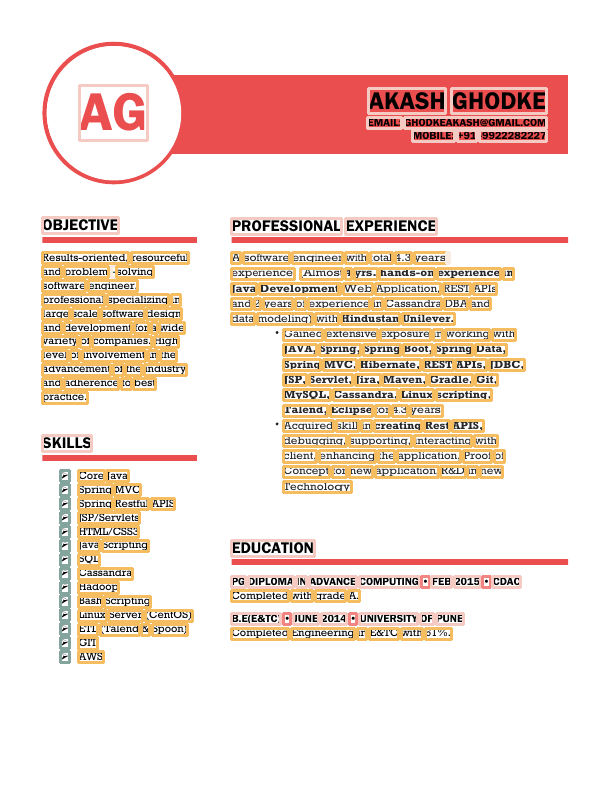

In [7]:
pdf_layout, pdf_images = lp.load_pdf(os.path.join(input_dir, os.listdir(input_dir)[20]), load_images=True)
lp.draw_box(pdf_images[0], pdf_layout[0])

In [19]:
os.listdir(input_dir)[70]

'tarunsinghDotbhumca09@gmailDotcom.pdf'

In [26]:
# pdf_layout[1]

## Pytessaract

In [28]:
import cv2
from pdf2image import convert_from_path
from pytesseract import Output
import numpy as np
import os
import pytesseract
from PIL import Image

In [29]:
input_dir = r'C:\Users\sagar.panwar\Documents\projects\resumse_parser\data\pdf'

In [30]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\sagar.panwar\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [8]:
images = convert_from_path(os.path.join(input_dir, os.listdir(input_dir)[20]))

In [9]:
len(images)

4

In [10]:
img = images[0]
img = cv2.resize(np.array(img), None, fx=0.5, fy=0.5)

In [11]:
cfg_filename = 'words'
pytesseract.run_and_get_output(img, extension='txt', config=cfg_filename)

'OBJECTIVE\n\nResults-oriented, resourceful\nand problem -solving\nsoftware engineer,\nprofessional specializing in\nlarge scale software design\nand development for a wide\nvariety of companies. High\nlevel of involvement in the\nadvancement of the industry\nand adherence to best\npractice.\n\nSKILLS\n\nCore Java\nSpring MVC\n\nSpring Restful APIS\nJSP/Serviets\nHTML/CSs3\n\nJava Scripting\n\nSOL\n\nCassandra\n\nHadoop\n\nBash Scripting\n\nLinux Server (CentOS)\nETL (Talend & Spoon)\ncir\n\nAWS\n\nVV VVVV VV YY VV YY\n\nPROFESSIONAL EXPERIENCE\nSS\nA software engineer with total 4.3 years’\nexperience. (Almost 4 yrs. hands-on experience in\nJava Development, Web Application, REST APIs\nand 2 years of experience in Cassandra DBA and\ndata modeling) with Hindustan Unilever.\n+ Gained extensive exposure in working with\nJAVA, Spring, Spring Boot, Spring Data,\nSpring MVC, Hibernate, REST APIs, JDBC,\nJSP, Servlet, Jira, Maven, Gradle, Git,\nMySQL, Cassandra, Linux scripting,\nTalend, Ecl

In [17]:
output_dir

'C:\\Users\\sagar.panwar\\Documents\\projects\\resumse_parser\\data'

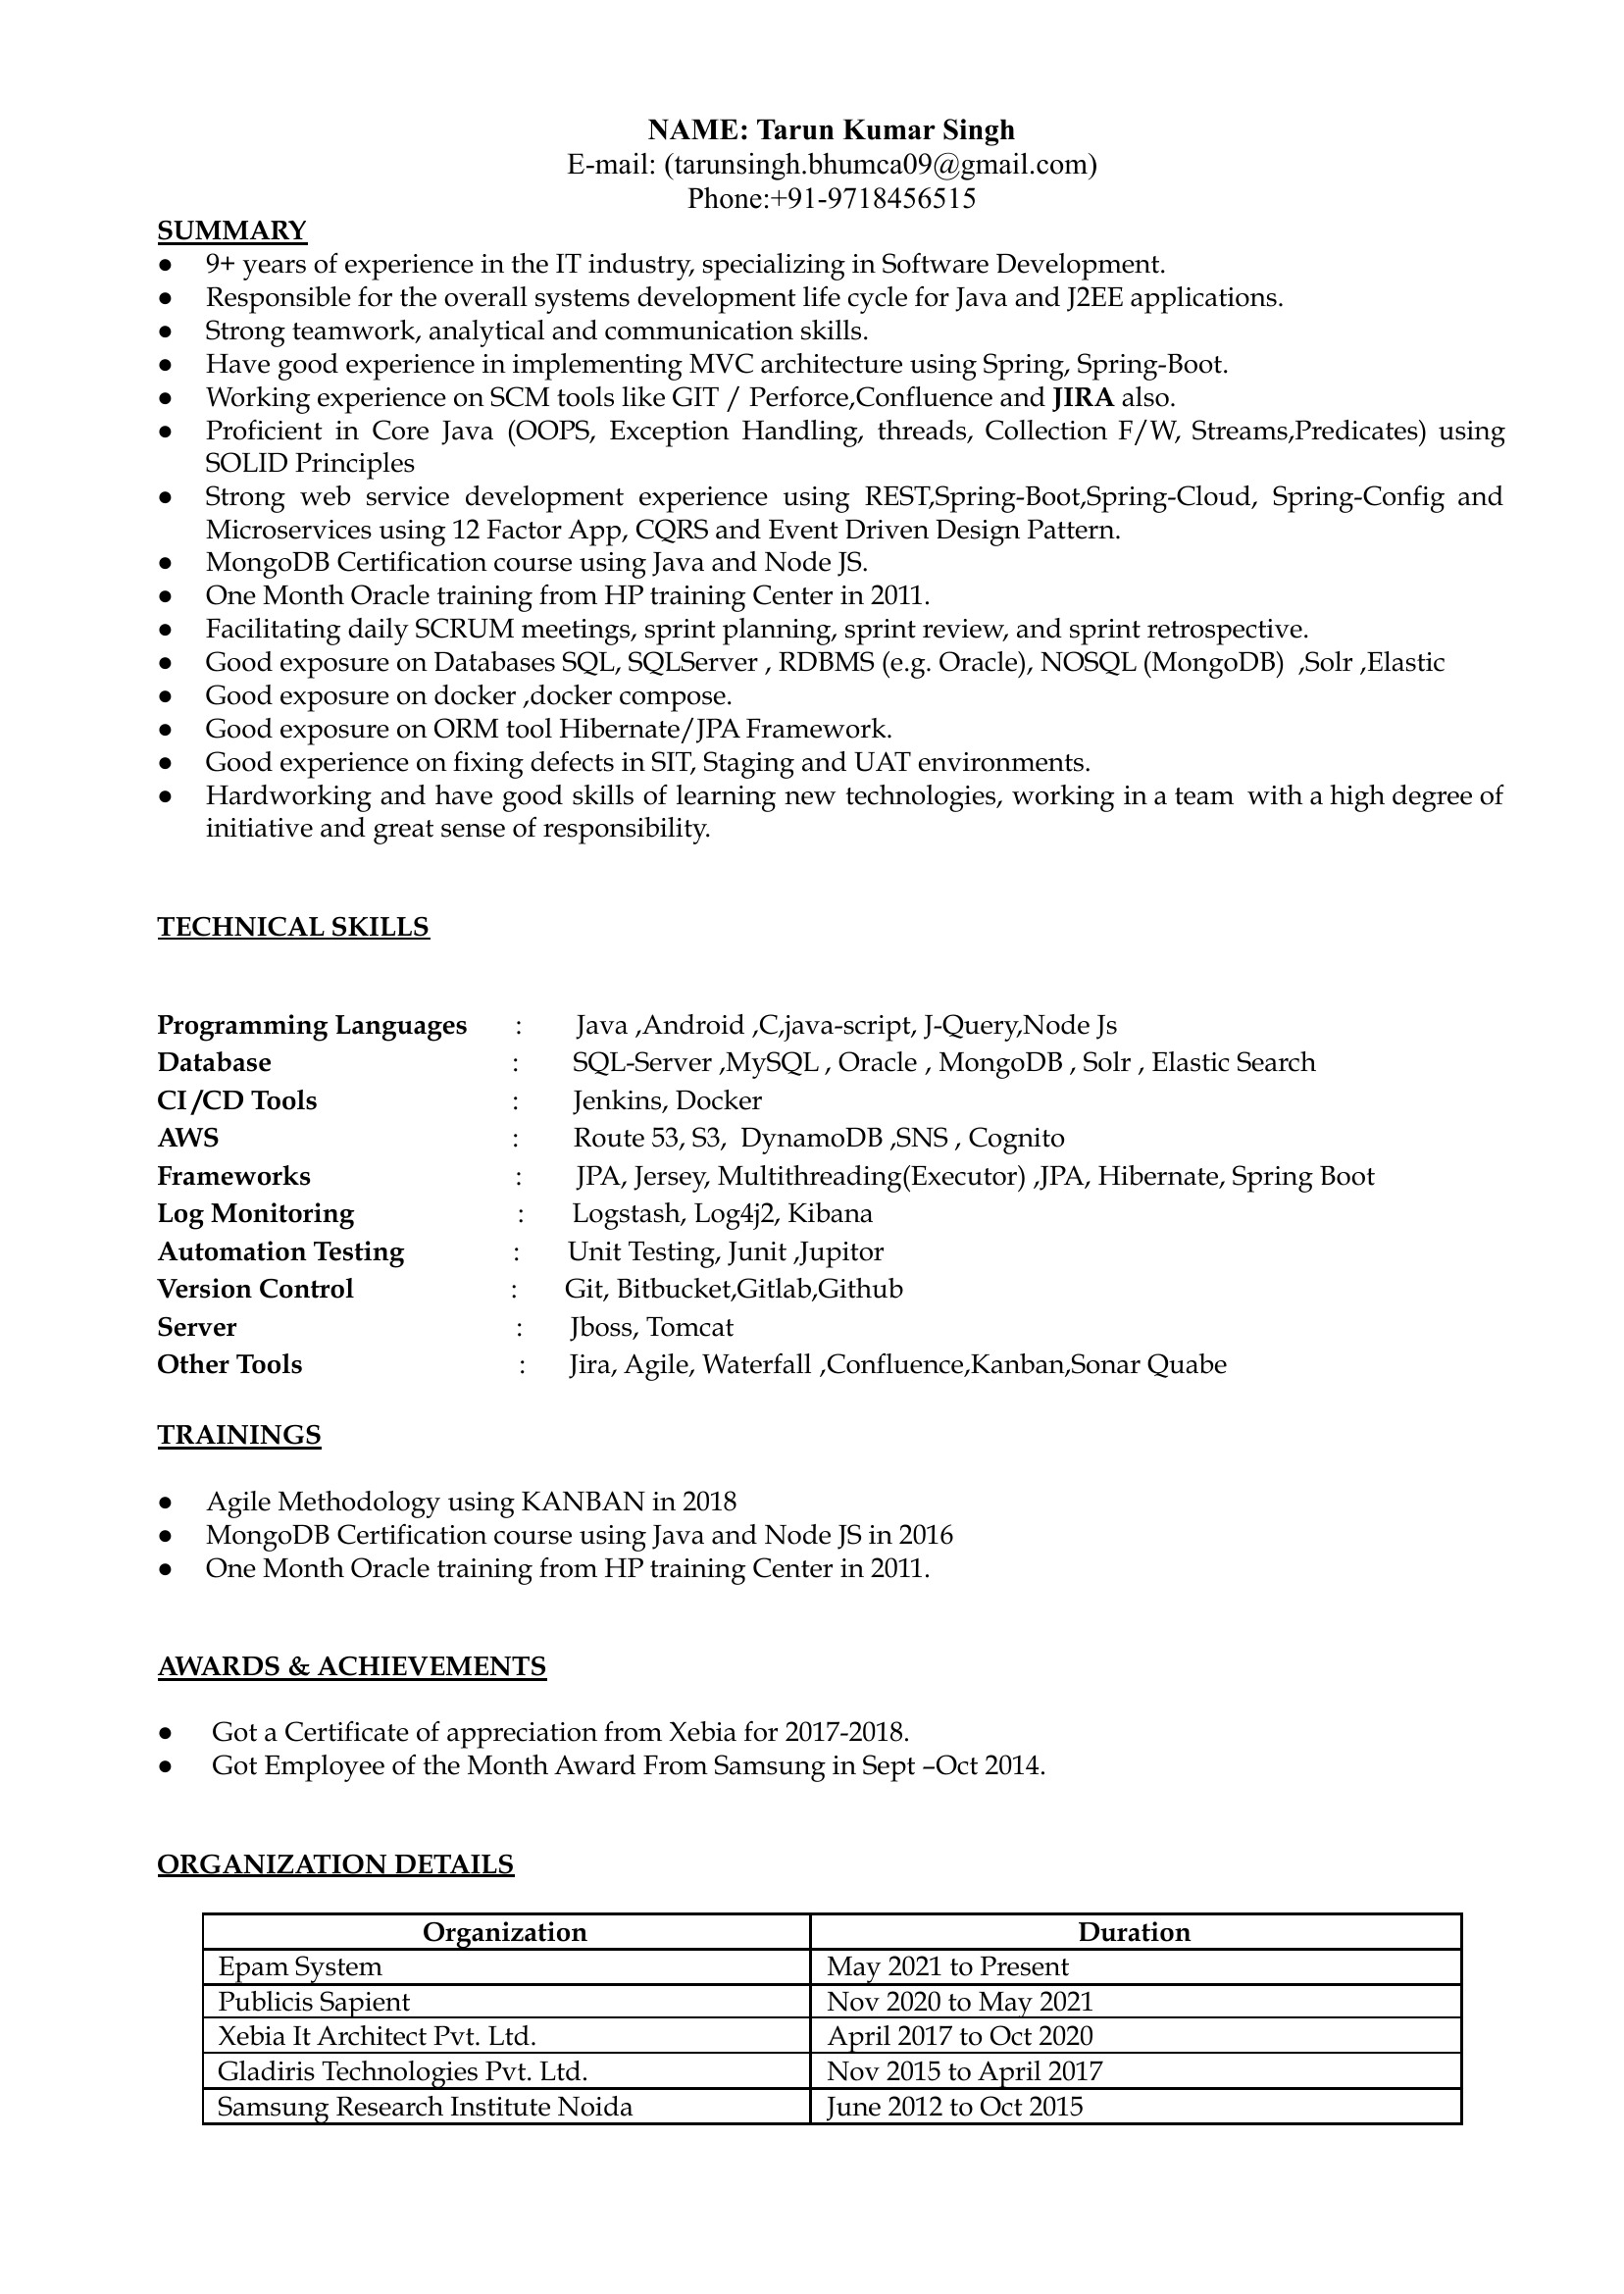

In [33]:
images[0]

In [44]:
data = pytesseract.image_to_data(os.path.join(output_dir, 'temp_img_1.jpg'))
pd.DataFrame([x.split('\t') for x in data.split('\n')])[:10]

,0,1,2,3,4,5,6,7,8,9,10,11
0,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
1,1,1,0,0,0,0,0,0,1656,2339,-1,
2,2,1,1,0,0,0,162,121,1373,436,-1,
3,3,1,1,1,0,0,162,121,1373,436,-1,
4,4,1,1,1,1,0,661,121,374,28,-1,
5,5,1,1,1,1,1,661,122,100,20,96.638275,NAME:
6,5,1,1,1,1,2,772,122,78,20,96.223312,Tarun
7,5,1,1,1,1,3,860,122,93,20,96.581322,Kumar
8,5,1,1,1,1,4,963,121,72,28,96.186241,Singh
9,4,1,1,1,2,0,579,156,539,28,-1,


In [40]:
pytesseract.image_to_alto_xml(os.path.join(output_dir, 'temp_img_1.jpg'))

'level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext\n1\t1\t0\t0\t0\t0\t0\t0\t1656\t2339\t-1\t\n2\t1\t1\t0\t0\t0\t162\t121\t1373\t436\t-1\t\n3\t1\t1\t1\t0\t0\t162\t121\t1373\t436\t-1\t\n4\t1\t1\t1\t1\t0\t661\t121\t374\t28\t-1\t\n5\t1\t1\t1\t1\t1\t661\t122\t100\t20\t96.638275\tNAME:\n5\t1\t1\t1\t1\t2\t772\t122\t78\t20\t96.223312\tTarun\n5\t1\t1\t1\t1\t3\t860\t122\t93\t20\t96.581322\tKumar\n5\t1\t1\t1\t1\t4\t963\t121\t72\t28\t96.186241\tSingh\n4\t1\t1\t1\t2\t0\t579\t156\t539\t28\t-1\t\n5\t1\t1\t1\t2\t1\t579\t156\t88\t21\t93.287712\tE-mail:\n5\t1\t1\t1\t2\t2\t678\t156\t440\t28\t91.340813\t(tarunsingh.bhumca09@gmail.com)\n4\t1\t1\t1\t3\t0\t702\t191\t292\t22\t-1\t\n5\t1\t1\t1\t3\t1\t702\t191\t292\t22\t80.995682\tPhone:+91-9718456515\n4\t1\t1\t1\t4\t0\t162\t225\t150\t19\t-1\t\n5\t1\t1\t1\t4\t1\t162\t225\t150\t19\t96.688889\tSUMMARY\n4\t1\t1\t1\t5\t0\t211\t258\t976\t28\t-1\t\n5\t1\t1\t1\t5\t1\t211\t259\t28\t19\t96.719803\t9+\n5\t1\t1\t1\t5\t2\t248\t26

In [34]:
# d = pytesseract.image_to_data(img, output_type=Output.DICT)
# n_boxes = len(d['level'])
boxes = pytesseract.image_to_boxes(img)
# for i in range(n_boxes):
#     (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
# draw the bounding boxes on the image
h, w, _ = img.shape 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)


In [38]:
# boxes.splitlines()

In [39]:
pil_image = Image.fromarray(img)
pil_image.show()

## Tessarct vs Layoutparser

In [19]:
%%time
images = convert_from_path(os.path.join(input_dir, os.listdir(input_dir)[70]))
img = images[0]
img = cv2.resize(np.array(img), None, fx=0.5, fy=0.5)
cfg_filename = 'words'
pytesseract.run_and_get_output(img, extension='txt', config=cfg_filename)

CPU times: total: 578 ms
Wall time: 1.88 s


'NAME: Tarun Kumar Singh\nE-mail: (tarunsingh.bhumea09@gmail.com)\nPhone:+91-9718456515\n\nSUMMARY.\n\n‘* 9 years of experience in the IT industry, specializing in Software Development.\n\n‘* Responsible for the overall systems development life cycle for Java and J2EE applications.\n\n* Strong teamwork, analytical and communication skills.\n\n* Have good experience in implementing MVC architecture using Spring, Spring-Boot.\n\n* Working experience on SCM tools like GIT / Perforce,Confluence and JIRA also.\n\n© Proficient in Core Java (OOPS, Exception Handling, threads, Collection F/W, Streams Predicates) using\nSOLID Principles\n\n‘© Strong web service development experience using RESTSpring-BootSpring-Cloud, Spring-Config and\nMicroservices using 12 Factor App, CORS and Event Driven Design Pattern.\n\n*  MongoDB Certification course using Java and Node JS.\n\nOne Month Oracle training from HP training Center in 2011.\n\n‘* Facilitating daily SCRUM meetings, sprint planning, sprint rev

In [20]:
# len(images)

CPU times: total: 2.69 s
Wall time: 2.87 s


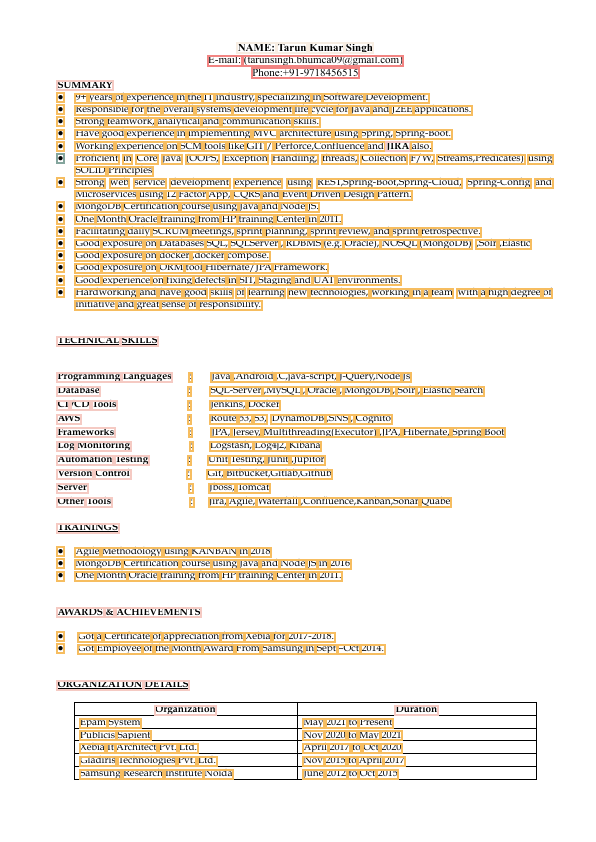

In [21]:
%%time
pdf_layout, pdf_images = lp.load_pdf(os.path.join(input_dir, os.listdir(input_dir)[70]), load_images=True)
lp.draw_box(pdf_images[0], pdf_layout[0])

## Detecting Sections

In [23]:
images = convert_from_path(os.path.join(input_dir, os.listdir(input_dir)[20]))

In [24]:
img = images[0]
img = cv2.resize(np.array(img), None, fx=0.5, fy=0.5)

In [25]:
# tuplify
def tup(point):
    return (point[0], point[1]);

# returns true if the two boxes overlap
def overlap(source, target):
    # unpack points
    tl1, br1 = source;
    tl2, br2 = target;

    # checks
    if (tl1[0] >= br2[0] or tl2[0] >= br1[0]):
        return False;
    if (tl1[1] >= br2[1] or tl2[1] >= br1[1]):
        return False;
    return True;

# returns all overlapping boxes
def getAllOverlaps(boxes, bounds, index):
    overlaps = [];
    for a in range(len(boxes)):
        if a != index:
            if overlap(bounds, boxes[a]):
                overlaps.append(a);
    return overlaps;

# img = cv2.imread("test.png")
orig = np.copy(img);
blue, green, red = cv2.split(img)

def medianCanny(img, thresh1, thresh2):
    median = np.median(img)
    img = cv2.Canny(img, int(thresh1 * median), int(thresh2 * median))
    return img

blue_edges = medianCanny(blue, 0, 1)
green_edges = medianCanny(green, 0, 1)
red_edges = medianCanny(red, 0, 1)

edges = blue_edges | green_edges | red_edges

# I'm using OpenCV 3.4. This returns (contours, hierarchy) in OpenCV 2 and 4
contours,hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)

# go through the contours and save the box edges
boxes = []; # each element is [[top-left], [bottom-right]];
hierarchy = hierarchy[0]
for component in zip(contours, hierarchy):
    currentContour = component[0]
    currentHierarchy = component[1]
    x,y,w,h = cv2.boundingRect(currentContour)
    if currentHierarchy[3] < 0:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        boxes.append([[x,y], [x+w, y+h]]);

# filter out excessively large boxes
filtered = [];
max_area = 30000;
for box in boxes:
    w = box[1][0] - box[0][0];
    h = box[1][1] - box[0][1];
    if w*h < max_area:
        filtered.append(box);
boxes = filtered;

# go through the boxes and start merging
merge_margin = 15;

# this is gonna take a long time
finished = False;
highlight = [[0,0], [1,1]];
points = [[[0,0]]];
while not finished:
    # set end con
    finished = True;

    # check progress
    print("Len Boxes: " + str(len(boxes)));

    # draw boxes # comment this section out to run faster
    copy = np.copy(orig);
    for box in boxes:
        cv2.rectangle(copy, tup(box[0]), tup(box[1]), (0,200,0), 1);
    cv2.rectangle(copy, tup(highlight[0]), tup(highlight[1]), (0,0,255), 2);
    for point in points:
        point = point[0];
        cv2.circle(copy, tup(point), 4, (255,0,0), -1);
#     cv2.imshow("Copy", copy);
#     key = cv2.waitKey(1);
#     if key == ord('q'):
#         break;

    # loop through boxes
    index = len(boxes) - 1;
    while index >= 0:
        # grab current box
        curr = boxes[index];

        # add margin
        tl = curr[0][:];
        br = curr[1][:];
        tl[0] -= merge_margin;
        tl[1] -= merge_margin;
        br[0] += merge_margin;
        br[1] += merge_margin;

        # get matching boxes
        overlaps = getAllOverlaps(boxes, [tl, br], index);
        
        # check if empty
        if len(overlaps) > 0:
            # combine boxes
            # convert to a contour
            con = [];
            overlaps.append(index);
            for ind in overlaps:
                tl, br = boxes[ind];
                con.append([tl]);
                con.append([br]);
            con = np.array(con);

            # get bounding rect
            x,y,w,h = cv2.boundingRect(con);

            # stop growing
            w -= 1;
            h -= 1;
            merged = [[x,y], [x+w, y+h]];

            # highlights
            highlight = merged[:];
            points = con;

            # remove boxes from list
            overlaps.sort(reverse = True);
            for ind in overlaps:
                del boxes[ind];
            boxes.append(merged);

            # set flag
            finished = False;
            break;

        # increment
        index -= 1;
cv2.destroyAllWindows();

# show final
copy = np.copy(orig);
for box in boxes:
    cv2.rectangle(copy, tup(box[0]), tup(box[1]), (0,200,0), 1);
# cv2.imshow("Final", copy);
# cv2.waitKey(0);

Len Boxes: 995
Len Boxes: 993
Len Boxes: 982
Len Boxes: 955
Len Boxes: 933
Len Boxes: 910
Len Boxes: 894
Len Boxes: 866
Len Boxes: 839
Len Boxes: 820
Len Boxes: 790
Len Boxes: 775
Len Boxes: 765
Len Boxes: 764
Len Boxes: 760
Len Boxes: 731
Len Boxes: 689
Len Boxes: 645
Len Boxes: 611
Len Boxes: 587
Len Boxes: 550
Len Boxes: 515
Len Boxes: 486
Len Boxes: 450
Len Boxes: 430
Len Boxes: 408
Len Boxes: 379
Len Boxes: 351
Len Boxes: 323
Len Boxes: 294
Len Boxes: 286
Len Boxes: 285
Len Boxes: 283
Len Boxes: 276
Len Boxes: 260
Len Boxes: 250
Len Boxes: 236
Len Boxes: 229
Len Boxes: 220
Len Boxes: 217
Len Boxes: 211
Len Boxes: 198
Len Boxes: 180
Len Boxes: 162
Len Boxes: 144
Len Boxes: 141
Len Boxes: 136
Len Boxes: 134
Len Boxes: 128
Len Boxes: 122
Len Boxes: 112
Len Boxes: 108
Len Boxes: 102
Len Boxes: 95
Len Boxes: 91
Len Boxes: 87
Len Boxes: 85
Len Boxes: 81
Len Boxes: 80
Len Boxes: 79
Len Boxes: 75
Len Boxes: 71
Len Boxes: 69
Len Boxes: 68
Len Boxes: 67
Len Boxes: 66
Len Boxes: 56
Len Boxes

In [26]:
pil_image = Image.fromarray(copy)
pil_image.show()

In [83]:
cv2.imshow('img', img)

In [ ]:
cv2.waitKey(0)

## Layout Parser logic for paragraph

In [9]:
%%time
pdf_layout, pdf_images = lp.load_pdf(os.path.join(input_dir, os.listdir(input_dir)[22]), load_images=True)

CPU times: total: 828 ms
Wall time: 1.25 s


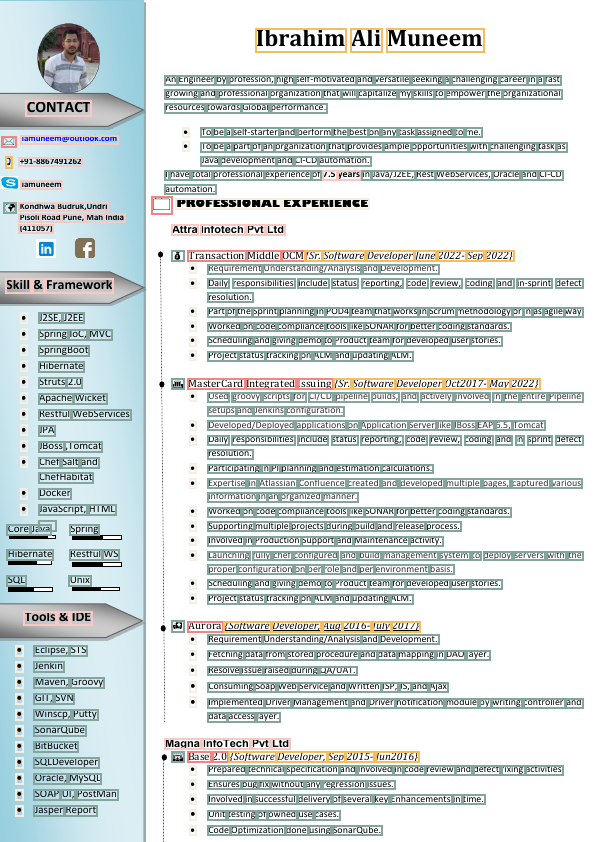

In [10]:
lp.draw_box(pdf_images[0], pdf_layout[0])

In [11]:
list(pdf_layout[0])[0]

TextBlock(block=Rectangle(x_1=26.910703487200156, y_1=100.85958285822873, x_2=90.71177665793185, y_2=116.82109939186617), text=CONTACT, id=0, type=ABCDEE+Calibri-Bold, parent=None, next=None, score=None)

In [12]:
def layout_to_df(layout):
    text_blocks      = list(layout)
    text_df  = pd.DataFrame(columns=['id', 'x1', 'x2' , 'y1', 'y2', 'text'])

    for index in range(len(text_blocks)):
        block = text_blocks[index]
        x1    = round(block.block.x_1, 1)
        x2    = round(block.block.x_2, 1)
        y1    = round(block.block.y_1, 1)
        y2    = round(block.block.y_2, 1)
        text  = block.text
        id    = block.id

        text_df.loc[len(text_df.index)] = [id, x1, x2, y1, y2, text]
        
    return text_df

In [13]:
df_pdf_layout = pd.DataFrame()
for index, layout in enumerate(pdf_layout):
    print(index)
    df_layout = layout_to_df(layout)
    df_pdf_layout = pd.concat([df_pdf_layout, df_layout], ignore_index=True)
#     print(df_pdf_layout)

0
1


In [14]:
df_layout = df_pdf_layout

In [15]:
df_layout.head(20)

,id,x1,x2,y1,y2,text
0,0,26.9,90.7,100.9,116.8,CONTACT
1,1,6.2,30.0,279.0,293.0,Skill
2,2,33.2,43.1,279.0,293.0,&
3,3,46.1,112.7,279.0,293.0,Framework
4,4,21.9,117.2,135.2,144.2,iamuneem@outlook.com
5,5,19.8,81.8,157.8,166.8,+91-8867491262
6,6,21.9,61.9,180.5,189.5,iamuneem
7,7,19.8,55.1,202.4,211.5,Kondhwa
8,8,57.2,107.6,202.4,211.5,"Budruk,Undri"
9,9,19.8,39.6,213.5,222.5,Pisoli


In [16]:
# Define a threshold for grouping values
threshold = 1.7

df_layout['y2_shift'] = df_layout['y2'].shift()
df_layout['y2_diff'] = df_layout['y2_shift'] - df_layout['y2']
# df_layout.y2_diff = df_layout.y2_diff.fillna(0)
df_layout.y2_diff = df_layout.y2_diff.abs()
df_layout['y2_diff_thres'] = df_layout.y2_diff<threshold
df_layout.y2_diff_thres = df_layout.y2_diff_thres.apply(lambda x: True if x == False else False)
df_layout['line'] = df_layout['y2_diff_thres'].cumsum()
df_layout.head(2)

,id,x1,x2,y1,y2,text,y2_shift,y2_diff,y2_diff_thres,line
0,0,26.9,90.7,100.9,116.8,CONTACT,NaN,NaN,True,1
1,1,6.2,30.0,279.0,293.0,Skill,116.8,176.2,True,2


In [17]:
# import fitz
# with fitz.open(os.path.join(input_dir, os.listdir(input_dir)[22])) as doc:
#     for page in doc:
#         text = page.get_text()
#         print(text)

In [19]:
groups = df_layout.groupby('line')
text = ''
for name, group in groups:
#     print(group)
    text = text + ' '.join(group['text']) + '\n'

In [21]:
print(text)

CONTACT
Skill & Framework
iamuneem@outlook.com
+91-8867491262
iamuneem
Kondhwa Budruk,Undri
Pisoli Road Pune, Mah India
(411057)


 J2SE, J2EE
 Spring IoC, MVC
 SpringBoot
 Hibernate
 Struts 2.0
 Apache Wicket
 Restful WebServices
 JPA
 JBoss ,Tomcat
 Chef Salt and
ChefHabitat
 Docker
 JavaScript, HTML
CSS
Core Java Spring
Hibernate Restful WS
SQL Unix
Ibrahim Ali Muneem
PROFESSIONAL EXPERIENCE

An Engineer by profession, high self-motivated and versatile seeking a challenging career in a fast
growing and professional organization that will capitalize my skills to empower the organizational
resources towards Global performance.
 To be a self-starter and perform the best on any task assigned to me.
 To be a part of an organization that provides ample opportunities with challenging task as
Java development and CI-CD automation.
I have total professional experience of 7.5 years in Java/J2EE, Rest WebServices, Oracle and CI-CD
automation.
Attra Infotech Pvt Ltd
 Transacti

In [22]:
'a' not in 'b'

True

In [23]:
urls = ['https://www.geminisolutions.com/', 'https://in.linkedin.com/company/gemini-solutions-india', 'https://www.glassdoor.co.in/Overview/Working-at-Gemini-Solutions-EI_IE1333027.11,27.htm', 'https://www.ambitionbox.com/overview/gemini-solutions-overview', 'https://www.geminisolutions.com//contact', 'https://www.geminisolutions.com/careers', 'https://www.geminisolutions.com/gem-university', 'https://www.geminisolutions.com//case-studies', 'https://www.geminisolutions.com//services/application-development', 'https://www.geminisolutions.com//services/digital-offerings', 'https://www.geminisolutions.com//services/managed-services', 'https://www.geminisolutions.com//services/cloud-solutions', 'https://www.geminisolutions.com//services/data-engineering', 'https://www.geminisolutions.com//services/data-science', 'https://www.geminisolutions.com//services/Infrastructure-services', 'https://www.geminisolutions.com//services/devsecops', 'https://www.geminisolutions.com//services/qa-coe', 'https://www.geminisolutions.com//technologies/front-end', 'https://www.geminisolutions.com//technologies/core-development', 'https://www.geminisolutions.com//technologies/databases', 'https://www.geminisolutions.com//technologies/cloud', 'https://www.geminisolutions.com//technologies/bi-and-analytics', 'https://www.geminisolutions.com//technologies/mobility', 'https://www.geminisolutions.com//about-us', 'https://www.geminisolutions.com//teams', 'https://www.geminisolutions.com//life-at-gemini', 'https://www.geminisolutions.com//careers', 'https://www.geminisolutions.com//campus', 'https://www.geminisolutions.com//hiring-process', 'https://www.geminisolutions.com//blogs', 'https://www.geminisolutions.com//case-studies', 'https://www.geminisolutions.com//contact', 'https://www.linkedin.com/company/gemini-solutions-india/mycompany/', 'https://www.facebook.com/gemsolindia/', 'https://www.instagram.com/gemini.solutions/', 'https://www.youtube.com/channel/UCYSfxDoj2IVw5yHllU73rAQ', 'https://twitter.com/geminiindia', 'https://www.glassdoor.co.in/Overview/Working-at-Gemini-Solutions-EI_IE1333027.11,27.htm', 'https://www.linkedin.com/company/gemini-solutions-india/mycompany/', 'https://www.facebook.com/gemsolindia/', 'https://www.instagram.com/gemini.solutions/', 'https://www.youtube.com/channel/UCYSfxDoj2IVw5yHllU73rAQ', 'https://twitter.com/geminiindia', 'https://www.glassdoor.co.in/Overview/Working-at-Gemini-Solutions-EI_IE1333027.11,27.htm', 'https://www.geminisolutions.com//terms-and-condition', 'https://www.geminisolutions.com//privacy-and-policy', 'https://www.geminisolutions.com//contact', 'https://www.geminisolutions.com/careers', 'https://www.geminisolutions.com/gem-university', 'https://www.geminisolutions.com//case-studies', 'https://www.geminisolutions.com//services/application-development', 'https://www.geminisolutions.com//services/digital-offerings', 'https://www.geminisolutions.com//services/managed-services', 'https://www.geminisolutions.com//services/cloud-solutions', 'https://www.geminisolutions.com//services/data-engineering', 'https://www.geminisolutions.com//services/data-science', 'https://www.geminisolutions.com//services/Infrastructure-services', 'https://www.geminisolutions.com//services/devsecops', 'https://www.geminisolutions.com//services/qa-coe', 'https://www.geminisolutions.com//technologies/front-end', 'https://www.geminisolutions.com//technologies/core-development', 'https://www.geminisolutions.com//technologies/databases', 'https://www.geminisolutions.com//technologies/cloud', 'https://www.geminisolutions.com//technologies/bi-and-analytics', 'https://www.geminisolutions.com//technologies/mobility', 'https://www.geminisolutions.com//about-us', 'https://www.geminisolutions.com//teams', 'https://www.geminisolutions.com//life-at-gemini', 'https://www.geminisolutions.com//careers', 'https://www.geminisolutions.com//campus', 'https://www.geminisolutions.com//hiring-process', 'https://www.geminisolutions.com//blogs', 'https://www.geminisolutions.com//case-studies', 'https://www.geminisolutions.com//contact', 'https://www.linkedin.com/company/gemini-solutions-india/mycompany/', 'https://www.instagram.com/gemini.solutions/', 'https://twitter.com/geminiindia', 'https://www.glassdoor.co.in/Overview/Working-at-Gemini-Solutions-EI_IE1333027.11,27.htm', 'https://www.linkedin.com/company/gemini-solutions-india/mycompany/', 'https://www.instagram.com/gemini.solutions/', 'https://twitter.com/geminiindia', 'https://www.glassdoor.co.in/Overview/Working-at-Gemini-Solutions-EI_IE1333027.11,27.htm', 'https://www.geminisolutions.com//terms-and-condition', 'https://www.geminisolutions.com//privacy-and-policy']


In [25]:
set(urls)

{'https://in.linkedin.com/company/gemini-solutions-india',
 'https://twitter.com/geminiindia',
 'https://www.ambitionbox.com/overview/gemini-solutions-overview',
 'https://www.facebook.com/gemsolindia/',
 'https://www.geminisolutions.com/',
 'https://www.geminisolutions.com//about-us',
 'https://www.geminisolutions.com//blogs',
 'https://www.geminisolutions.com//campus',
 'https://www.geminisolutions.com//careers',
 'https://www.geminisolutions.com//case-studies',
 'https://www.geminisolutions.com//contact',
 'https://www.geminisolutions.com//hiring-process',
 'https://www.geminisolutions.com//life-at-gemini',
 'https://www.geminisolutions.com//privacy-and-policy',
 'https://www.geminisolutions.com//services/Infrastructure-services',
 'https://www.geminisolutions.com//services/application-development',
 'https://www.geminisolutions.com//services/cloud-solutions',
 'https://www.geminisolutions.com//services/data-engineering',
 'https://www.geminisolutions.com//services/data-science',
 '